In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import BarycentricMeanEcliptic, Galactic, Galactocentric

In [2]:
def sech2(x):
    return 1/np.cosh(x)

def log_galaxy(lon, lat):
    #lon=lon+np.pi
    sky_ecl = SkyCoord(lon=lon*u.rad,
                       lat=lat*u.rad, distance=8*u.kpc, frame='barycentricmeanecliptic')
    #sky_gal = sky_ecl.transform_to(Galactic).cartesian
    sky_gal = sky_ecl.transform_to(Galactocentric).cartesian
    alpha = 0.25; Rb = 0.8; Rd = 2.5; Zd = 0.4
    r2 = sky_gal.x**2+sky_gal.y**2+sky_gal.z**2
    u2 = sky_gal.x**2+sky_gal.y**2
    e1 = -r2/Rb**2
    e2 = -np.sqrt(u2)/Rd
    s = sky_gal.z.value/Zd
    p = alpha*np.exp(e1.value)+(1-alpha)*np.exp(e2.value)*sech2(s)
    return p


nbeta = 1000
nlambda = 2000
lb = np.linspace(-np.pi/2, np.pi/2, nbeta)[::-1]
#ll = np.linspace(0, 2*np.pi, nlambda, endpoint=False)
ll_ = np.linspace(-np.pi, np.pi, nlambda, endpoint=False)

Lon,Lat = np.meshgrid(ll_,lb)
loggal = log_galaxy(Lon+np.pi, Lat)

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='mollweide')
#im = ax.pcolormesh(Lon, Lat, np.log(loggal))

#plt.savefig("sky.png")
#plt.show()



In [14]:
beta=0.12593165997790268
lamb=0.71733837
beta_deg=beta*(180/np.pi)
lamb_deg=lamb*(180/np.pi)
print(np.log(log_galaxy(lamb,beta)))
print(beta_deg)
print(lamb_deg)
lamb_test=-np.pi
beta_test=65*(np.pi/180)
lamb_test=85*(np.pi/180)
beta_test=15*(np.pi/180)
print(beta_test)
print(lamb_test)

print(np.log(log_galaxy(lamb_test,beta_test)))



-16.88415400601895
7.215352623810365
41.10046108379387
0.2617993877991494
1.4835298641951802
-7.311344881506857


In [28]:
Lon,Lat = np.meshgrid(lamb,beta)
print(np.log(log_galaxy(Lon+np.pi,beta)))

[[-15.07263189]]


In [26]:
tab_lamb=np.linspace(-0.3,1.7,nlambda,endpoint=False)
tab_beta=np.linspace(-0.9,1.12,nbeta)[::-1]
plt.plot()

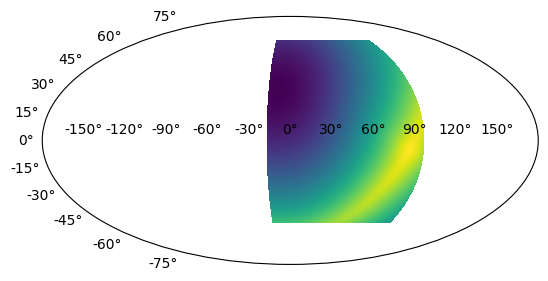

In [27]:
Lon,Lat = np.meshgrid((tab_lamb),tab_beta)
loggal = log_galaxy(Lon+np.pi, Lat)
fig = plt.figure()
ax = fig.add_subplot(111, projection='mollweide')
im = ax.pcolormesh(Lon, Lat, np.log(loggal))